In [5]:
#writing some conda package or module
#!pip install netCDF4
%matplotlib inline
import warnings
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
#!pip install cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
import regionmask


#regionmask.__version__


In [7]:
lon = np.arange(86,94,0.25)
lat = np.arange(18,28,0.25)

mask = regionmask.defined_regions.srex.mask(lon,lat)
mask

<xarray.DataArray 'mask' (lat: 40, lon: 32)>
array([[23., 23., 23., ..., 23., 23., 23.],
       [23., 23., 23., ..., 23., 23., 23.],
       [23., 23., 23., ..., 23., 23., 23.],
       ...,
       [23., 23., 23., ..., 23., 23., 23.],
       [23., 23., 23., ..., 23., 23., 23.],
       [23., 23., 23., ..., 23., 23., 23.]])
Coordinates:
  * lat      (lat) float64 18.0 18.25 18.5 18.75 19.0 ... 27.0 27.25 27.5 27.75
  * lon      (lon) float64 86.0 86.25 86.5 86.75 87.0 ... 93.0 93.25 93.5 93.75

In [2]:
rain_minimum = 1.0
rain_maximum = 250.0
rain_step = 1.0
spd = 86400.0
sph = 3600.0
mpy = 30.4167

nrainbin = int((rain_maximum-rain_minimum)/rain_step) + 1

rain_pdf = np.linspace(rain_minimum,rain_maximum, num=nrainbin, endpoint=True)
rain_bin = np.zeros((nrainbin-1))


In [18]:

prch = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/observation/chirps/chirps-v2.0.monthly.nc')

prch




<xarray.Dataset>
Dimensions:    (latitude: 2000, longitude: 7200, time: 496)
Coordinates:
  * latitude   (latitude) float32 -49.97 -49.92 -49.88 ... 49.87 49.92 49.97
  * longitude  (longitude) float32 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
  * time       (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2022-04-01
Data variables:
    precip     (time, latitude, longitude) float32 ...
Attributes: (12/15)
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2022-05-16
    creator_name:      Pete Peterson
    ...                ...
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given month.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ

In [21]:
prch = prch.sel(time=slice('1981-01-16T12:00:00.000000000','2015-12-16T00:00:00.000000000'))

prch = prch.sel(longitude=slice(86,94),latitude=slice(18,28))

prch

<xarray.Dataset>
Dimensions:    (latitude: 200, longitude: 160, time: 419)
Coordinates:
  * latitude   (latitude) float32 18.02 18.07 18.12 18.17 ... 27.88 27.92 27.97
  * longitude  (longitude) float32 86.02 86.08 86.12 86.17 ... 93.88 93.92 93.98
  * time       (time) datetime64[ns] 1981-02-01 1981-03-01 ... 2015-12-01
Data variables:
    precip     (time, latitude, longitude) float32 ...
Attributes: (12/15)
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2022-05-16
    creator_name:      Pete Peterson
    ...                ...
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given month.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ

In [31]:

prt = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/observation/trm/MonthlyTRMM_3B43/3B43.1998_2008.nc')

prt

<xarray.Dataset>
Dimensions:  (time: 132, lat: 400, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 1998-01-01 1998-02-01 ... 2008-12-01
  * lat      (lat) float32 -49.88 -49.62 -49.38 -49.12 ... 49.38 49.62 49.88
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
Data variables:
    date     (time) int32 ...
    datesec  (time) timedelta64[ns] ...
    precip   (time, lat, lon) float32 ...
Attributes:
    creation_date:             Thu Nov  5 16:19:03 CET 2009
    Conventions:               None
    source_html:               \nhttp://disc.sci.gsfc.nasa.gov/data/datapool/...
    title:                     TRMM: 3B43
    history:                   Thu Nov  5 16:26:10 2009: ncrcat 3B43.1998.nc ...
    nco_openmp_thread_number:  1

In [32]:

prt = prt.sel(time=slice('1981-01-16T12:00:00.000000000','2015-12-16T00:00:00.000000000'))


prt = prt.sel(lon=slice(86,94),lat=slice(18,28))

prt

<xarray.Dataset>
Dimensions:  (time: 132, lat: 40, lon: 32)
Coordinates:
  * time     (time) datetime64[ns] 1998-01-01 1998-02-01 ... 2008-12-01
  * lat      (lat) float32 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88
  * lon      (lon) float32 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
Data variables:
    date     (time) int32 19980101 19980201 19980301 ... 20081101 20081201
    datesec  (time) timedelta64[ns] 1 days 1 days 1 days ... 1 days 1 days
    precip   (time, lat, lon) float32 ...
Attributes:
    creation_date:             Thu Nov  5 16:19:03 CET 2009
    Conventions:               None
    source_html:               \nhttp://disc.sci.gsfc.nasa.gov/data/datapool/...
    title:                     TRMM: 3B43
    history:                   Thu Nov  5 16:26:10 2009: ncrcat 3B43.1998.nc ...
    nco_openmp_thread_number:  1

In [33]:
prn = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/regcm driven by gcm/NorESM1-M/noresm_pr_197001-200512.nc')

prn

<xarray.Dataset>
Dimensions:    (time: 432, bnds: 2, y: 337, x: 429)
Coordinates:
  * time       (time) object 1970-01-16 12:00:00 ... 2005-12-16 12:00:00
    lon        (y, x) float64 ...
    lat        (y, x) float64 ...
  * x          (x) float64 -5.35e+06 -5.325e+06 -5.3e+06 ... 5.325e+06 5.35e+06
  * y          (y) float64 -4.2e+06 -4.175e+06 -4.15e+06 ... 4.175e+06 4.2e+06
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    crs        |S1 ...
    pr         (time, y, x) float32 ...
Attributes: (12/165)
    CDI:                                             Climate Data Interface v...
    Conventions:                                     CF-1.7
    history:                                         Mon Jun 27 15:36:42 2022...
    source:                                          RegCM Model output file
    institution:                                     Oak Ridge National Labor...
    project_id:                                      CORDEX
    ...                                              ...
    experiment_id:                                   historical
    driving_experiment_name:                         historical
    model_id:                                        ICTP-RegCM4-7
    driving_experiment:                              NCC-NorESM1-M, historica...
    driving_model_id:                                NCC-NorESM1-M
    CDO:                                             Climate Data Operators v...

In [35]:
prn = prn.sel(time=slice('1981-01-16T12:00:00.000000000','2015-12-16T00:00:00.000000000'))


#prn = prn.sel(lon=slice(86,94),lat=slice(18,28))

prn

ValueError: no ISO-8601 or cftime-string-like match for string: 1981-01-16T12:00:00.000000000

In [8]:
prmp = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/regcm driven by gcm/MPI-ESM-MR/mpiesm_pr_197001-200512.nc')

prmp

<xarray.Dataset>
Dimensions:    (time: 432, bnds: 2, y: 337, x: 429)
Coordinates:
  * time       (time) datetime64[ns] 1970-01-16T12:00:00 ... 2005-12-16T12:00:00
    lon        (y, x) float64 ...
    lat        (y, x) float64 ...
  * x          (x) float64 -5.35e+06 -5.325e+06 -5.3e+06 ... 5.325e+06 5.35e+06
  * y          (y) float64 -4.2e+06 -4.175e+06 -4.15e+06 ... 4.175e+06 4.2e+06
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    crs        |S1 ...
    pr         (time, y, x) float32 ...
Attributes: (12/165)
    CDI:                                             Climate Data Interface v...
    Conventions:                                     CF-1.7
    history:                                         Mon Jun 27 15:35:42 2022...
    source:                                          RegCM Model output file
    institution:                                     Oak Ridge National Labor...
    project_id:                                      CORDEX
    ...                                              ...
    experiment_id:                                   historical
    driving_experiment:                              MPI-M-MPI-ESM-MR, histor...
    driving_model_id:                                MPI-M-MPI-ESM-MR
    driving_experiment_name:                         historical
    model_id:                                        ICTP-RegCM4-7
    CDO:                                             Climate Data Operators v...

In [10]:
prmi = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/regcm driven by gcm/MIROC5/miroc5_pr_197001-200512.nc')

prmi

<xarray.Dataset>
Dimensions:    (time: 432, bnds: 2, y: 337, x: 429)
Coordinates:
  * time       (time) object 1970-01-16 12:00:00 ... 2005-12-16 12:00:00
    lon        (y, x) float64 ...
    lat        (y, x) float64 ...
  * x          (x) float64 -5.35e+06 -5.325e+06 -5.3e+06 ... 5.325e+06 5.35e+06
  * y          (y) float64 -4.2e+06 -4.175e+06 -4.15e+06 ... 4.175e+06 4.2e+06
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    crs        |S1 ...
    pr         (time, y, x) float32 ...
Attributes: (12/165)
    CDI:                                             Climate Data Interface v...
    Conventions:                                     CF-1.7
    history:                                         Mon Jun 27 15:34:28 2022...
    source:                                          RegCM Model output file
    institution:                                     Oak Ridge National Labor...
    project_id:                                      CORDEX
    ...                                              ...
    experiment_id:                                   historical
    driving_experiment:                              MIROC-MIROC5, historical...
    driving_model_id:                                MIROC-MIROC5
    driving_experiment_name:                         historical
    model_id:                                        ICTP-RegCM4-7
    CDO:                                             Climate Data Operators v...

In [11]:
prer = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/regcm driven by gcm/Era_intrim/pr_was-22-ecmwf_197901-201711.nc')

prer

<xarray.Dataset>
Dimensions:    (time: 467, bnds: 2, y: 337, x: 429)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-16T12:00:00 ... 2017-11-16
    lon        (y, x) float64 ...
    lat        (y, x) float64 ...
  * x          (x) float64 -5.35e+06 -5.325e+06 -5.3e+06 ... 5.325e+06 5.35e+06
  * y          (y) float64 -4.2e+06 -4.175e+06 -4.15e+06 ... 4.175e+06 4.2e+06
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    crs        |S1 ...
    pr         (time, y, x) float32 ...
Attributes: (12/165)
    CDI:                                             Climate Data Interface v...
    Conventions:                                     CF-1.7
    history:                                         Wed Jul 13 17:38:34 2022...
    source:                                          RegCM Model output file
    institution:                                     International Centre for...
    project_id:                                      CORDEX
    ...                                              ...
    experiment_id:                                   evaluation
    driving_experiment:                              ECMWF-ERAINT, evaluation...
    driving_model_id:                                ECMWF-ERAINT
    driving_experiment_name:                         evaluation
    model_id:                                        ICTP-RegCM4-7
    CDO:                                             Climate Data Operators v...

In [38]:

#interpolating to new lat and lon

#new_lon = np.arange(85,94,0.5)
#new_lat = np.arange(17,28,0.5)
#pr = pr.interp(latitude=new_lat,longitude=new_lon)
#pr


In [15]:
size = pr.precip.shape
print(size)


(420, 440, 440)


In [16]:
sizec = prcr.pre.shape
print(sizec)

(431, 360, 720)


In [41]:
sizen = prn.pr.shape
print(sizen)

(432, 337, 429)


In [42]:
rain_bin_cr=rain_bin 


for time in range(sizec[0]):
        data = prcr.pre[time,Ellipsis] /mpy
        nzd  = data.values[tuple(np.where(data >= rain_minimum))]
        hist = np.histogram(nzd,
                            bins = nrainbin-1,
                            range = (rain_minimum, rain_maximum))
        rain_bin_cr = rain_bin_cr + hist[0]

In [43]:
rain_bin_n=rain_bin 


for time in range(sizen[0]):
        data = prn.pr[time,Ellipsis] *spd
        nzd  = data.values[tuple(np.where(data >= rain_minimum))]
        hist = np.histogram(nzd,
                            bins = nrainbin-1,
                            range = (rain_minimum, rain_maximum))
        rain_bin_n = rain_bin_n + hist[0]

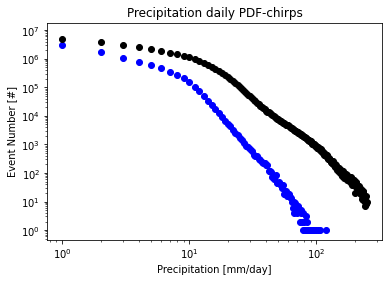

In [45]:


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(rain_bin_cr, 'bo')
plt.plot(rain_bin_n, 'ko')



ax.set_yscale('log')
ax.set_xscale('log')
plt.xlabel('Precipitation [mm/day]')
plt.ylabel('Event Number [#]')
plt.title('Precipitation daily PDF-chirps')
#plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/pdf_chirps.png")



plt.show( )